In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
X = np.array([1,2,3,4,5])
Y = np.array([7,14,15,18,19])

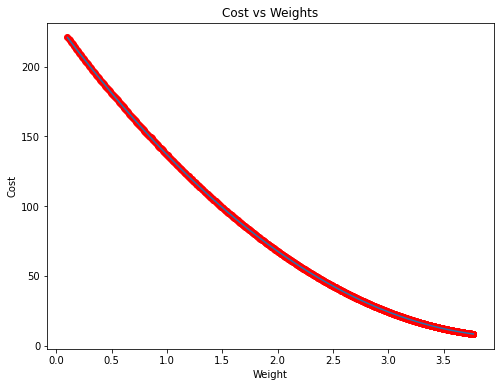

Estimated Q0 =  1.2073951003350214
Estimated Q1 =  3.7697826975552915


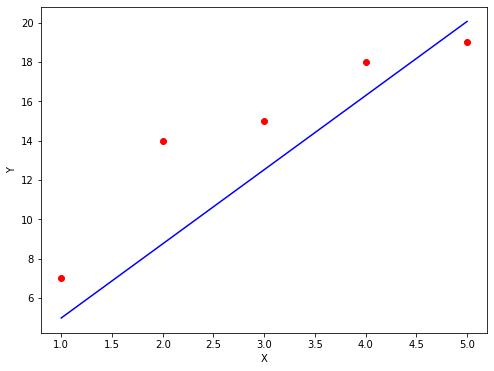

In [5]:
def mean_squared_error(y_actual, y_predicted):     # Calculating the cost
    n = len(y_actual)
    cost = np.sum((y_actual-y_predicted)**2) / n
    return cost

def gradient_descent(x, y, iterations = 1000, learning_rate = 0.0001, stopping_threshold = 1e-6) :
    current_q1 = 0.1
    current_q0 = 0.01
    iters = iterations
    lr = learning_rate
    n = float(len(x))
    prev_cost = None
    
    q1s = []
    q0s = []
    for i in range(iters):
        y_pred = (current_q1 * x) + current_q0
         
        # Calculationg the current cost
        current_cost = mean_squared_error(y, y_pred)
        if prev_cost and abs(prev_cost - current_cost) <= stopping_threshold :
            break
         
        prev_cost = current_cost
 
        q0s.append(current_cost)
        q1s.append(current_q1)
         
        # Calculating the gradients
        weight_derivative = -(2/n) * sum(x * (y-y_pred))
        bias_derivative = -(2/n) * sum(y-y_pred)
         
        # Updating weights and bias
        current_q1 = current_q1 - (lr * weight_derivative)
        current_q0 = current_q0 - (lr * bias_derivative)
                 
        
    # Visualizing the weights and cost at for all iterations
    plt.figure(figsize = (8,6))
    plt.plot(q1s, q0s)
    plt.scatter(q1s, q0s, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()
     
    return current_q1, current_q0

estimated_Q1, estimated_Q0 = gradient_descent(X, Y)
print("Estimated Q0 = ", estimated_Q0)
print("Estimated Q1 = ",estimated_Q1)

# Making predictions using estimated parameters
Y_pred = estimated_Q1*X + estimated_Q0

# Plotting the regression line
plt.figure(figsize = (8,6))
plt.scatter(X, Y, marker='o', color='red')
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()